In [1]:
# https://www.kaggle.com/code/nourabentaher/brats2019-2dunet
# Brats source

In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('Brats 2017'):
    # print(dirname,_,filenames)
    for filename in filenames:
        print(os.path.join(dirname))

Brats 2017\BRATS2017\Brats17TestingData
Brats 2017\BRATS2017\Brats17TestingData\Brats17_2013_31_1
Brats 2017\BRATS2017\Brats17TestingData\Brats17_2013_31_1
Brats 2017\BRATS2017\Brats17TestingData\Brats17_2013_31_1
Brats 2017\BRATS2017\Brats17TestingData\Brats17_2013_31_1
Brats 2017\BRATS2017\Brats17TestingData\Brats17_2013_32_1
Brats 2017\BRATS2017\Brats17TestingData\Brats17_2013_32_1
Brats 2017\BRATS2017\Brats17TestingData\Brats17_2013_32_1
Brats 2017\BRATS2017\Brats17TestingData\Brats17_2013_32_1
Brats 2017\BRATS2017\Brats17TestingData\Brats17_2013_33_1
Brats 2017\BRATS2017\Brats17TestingData\Brats17_2013_33_1
Brats 2017\BRATS2017\Brats17TestingData\Brats17_2013_33_1
Brats 2017\BRATS2017\Brats17TestingData\Brats17_2013_33_1
Brats 2017\BRATS2017\Brats17TestingData\Brats17_2013_34_1
Brats 2017\BRATS2017\Brats17TestingData\Brats17_2013_34_1
Brats 2017\BRATS2017\Brats17TestingData\Brats17_2013_34_1
Brats 2017\BRATS2017\Brats17TestingData\Brats17_2013_34_1
Brats 2017\BRATS2017\Brats17Test

In [3]:
import os
from glob import glob

import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
import nibabel as nib
import numpy as np
import pandas as pd
from matplotlib import animation, cm, colors, rc
from scipy import ndimage

In [6]:
import os
import cv2
import glob
import PIL
import shutil
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from skimage import data
from skimage.util import montage 
import skimage.transform as skTrans
from skimage.transform import rotate
from skimage.transform import resize
from PIL import Image, ImageOps  

# neural imaging
import nilearn as nl
import nibabel as nib
import nilearn.plotting as nlplt

# neural networks
from glob import glob

import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
import nibabel as nib
import numpy as np
import pandas as pd
from matplotlib import animation, cm, colors, rc
from scipy import ndimage


In [7]:
DATA_PATH = 'Brats 2017/BRATS2017'
TRAIN_PATH = f'{DATA_PATH}/Brats17TrainingData/HGG'
TEST_PATH = f'{DATA_PATH}/Brats17TestingData'
DATA_TYPES = ['flair', 't1', 't1ce', 't2', 'seg']

In [8]:
# DEFINE seg-areas  
SEGMENT_CLASSES = {
    0 : 'NOT tumor',   
    1 : 'NECROTIC/CORE', # or NON-ENHANCING tumor CORE - RED
    2 : 'EDEMA',  # Green
    3 : 'ENHANCING' # original 4 -> converted into 3 later, Yellow
}

# there are 155 slices per volume
# to start at 5 and use 145 slices means we will skip the first 5 and last 5 
VOLUME_SLICES = 100 
VOLUME_START_AT = 22 # first slice of volume that we will include

IMG_SIZE=128

In [9]:
# for f in flair:
#     test_image_flair=nib.load(f).get_fdata()
#     print(test_image_flair[:,:,test_image_flair.shape[0]//2-slice_w], cmap = 'gray')

In [8]:
# test_image_flair[:,:,test_image_flair.shape[0]//2-slice_w].shape

## Brats 2017

In [10]:
# TRAIN_DATASET_PATH = '../input/brain-tumor-segmentation-brats-2019/MICCAI_BraTS_2019_Data_Training/HGG/'
#VALIDATION_DATASET_PATH = '../input/d/debobratachakraborty/brats2019-dataset/MICCAI_BraTS_2019_Data_Training/'
TRAIN_DATASET_PATH='Brats 2017/BRATS2017/Brats17TrainingData/HGG/'
# print(os.path.isdir(TRAIN_DATASET_PATH))

test_image_flair_17=nib.load(TRAIN_DATASET_PATH + 'Brats17_2013_10_1/Brats17_2013_10_1_flair.nii').get_fdata()
test_image_t1_17=nib.load(TRAIN_DATASET_PATH + 'Brats17_2013_10_1/Brats17_2013_10_1_t1.nii').get_fdata()

test_image_t1ce_17=nib.load(TRAIN_DATASET_PATH + 'Brats17_2013_10_1/Brats17_2013_10_1_t1ce.nii').get_fdata()
test_image_t2_17=nib.load(TRAIN_DATASET_PATH + 'Brats17_2013_10_1/Brats17_2013_10_1_t2.nii').get_fdata()
test_mask_17=nib.load(TRAIN_DATASET_PATH + 'Brats17_2013_10_1/Brats17_2013_10_1_seg.nii').get_fdata()

test_image_t1_17.shape
# fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(1,5, figsize = (20, 10))
# slice_w = 25
# ax1.imshow(test_image_flair_17[:,:,test_image_flair_17.shape[0]//2-slice_w], cmap = 'gray')
# ax1.set_title('Image flair')
# ax2.imshow(test_image_t1_17[:,:,test_image_t1_17.shape[0]//2-slice_w], cmap = 'gray')
# ax2.set_title('Image t1')
# ax3.imshow(test_image_t1ce_17[:,:,test_image_t1ce_17.shape[0]//2-slice_w], cmap = 'gray')
# ax3.set_title('Image t1ce')
# ax4.imshow(test_image_t2_17[:,:,test_image_t2_17.shape[0]//2-slice_w], cmap = 'gray')
# ax4.set_title('Image t2')
# ax5.imshow(test_mask_17[:,:,test_mask_17.shape[0]//2-slice_w])
# ax5.set_title('Mask')

(240, 240, 155)

Text(0.5, 1.0, 'Mask')

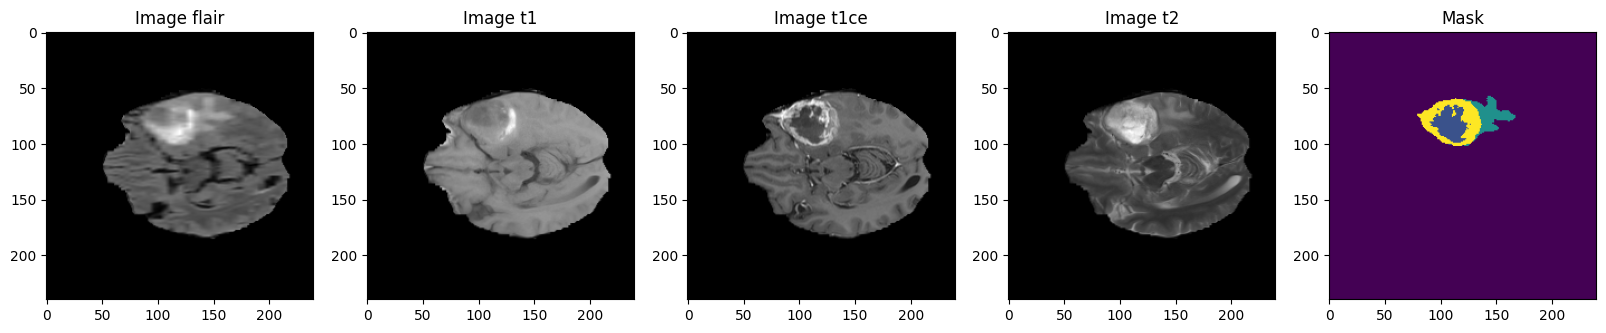

In [10]:
TRAIN_DATASET_PATH = 'Brats 2018/MICCAI_BraTS_2018_Data_Training/HGG/'
#VALIDATION_DATASET_PATH = '../input/d/debobratachakraborty/brats2018-dataset/MICCAI_BraTS_2018_Data_Training/'

test_image_flair=nib.load(TRAIN_DATASET_PATH + 'BraTS18_2013_10_1/BraTS18_2013_10_1_flair.nii').get_fdata()
test_image_t1=nib.load(TRAIN_DATASET_PATH + 'BraTS18_2013_10_1/BraTS18_2013_10_1_t1.nii').get_fdata()

test_image_t1ce=nib.load(TRAIN_DATASET_PATH + 'BraTS18_2013_10_1/BraTS18_2013_10_1_t1ce.nii').get_fdata()
test_image_t2=nib.load(TRAIN_DATASET_PATH + 'BraTS18_2013_10_1/BraTS18_2013_10_1_t2.nii').get_fdata()
test_mask=nib.load(TRAIN_DATASET_PATH + 'BraTS18_2013_10_1/BraTS18_2013_10_1_seg.nii').get_fdata()



fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(1,5, figsize = (20, 10))
slice_w = 60
ax1.imshow(test_image_flair[:,:,test_image_flair.shape[0]//2-slice_w], cmap = 'gray')
ax1.set_title('Image flair')
ax2.imshow(test_image_t1[:,:,test_image_t1.shape[0]//2-slice_w], cmap = 'gray')
ax2.set_title('Image t1')
ax3.imshow(test_image_t1ce[:,:,test_image_t1ce.shape[0]//2-slice_w], cmap = 'gray')
ax3.set_title('Image t1ce')
ax4.imshow(test_image_t2[:,:,test_image_t2.shape[0]//2-slice_w], cmap = 'gray')
ax4.set_title('Image t2')
ax5.imshow(test_mask[:,:,test_mask.shape[0]//2-slice_w])
ax5.set_title('Mask')

Text(0.5, 1.0, 'Mask')

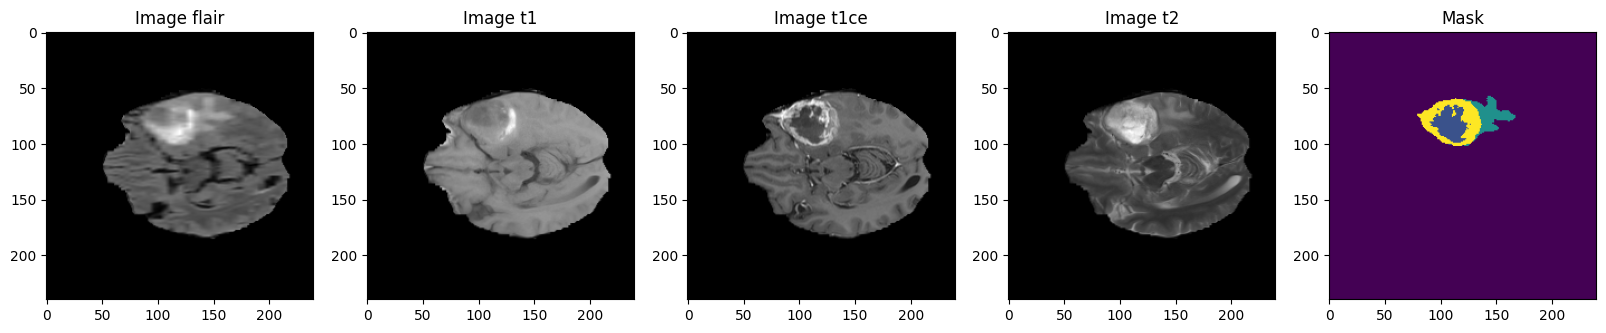

In [11]:
TRAIN_DATASET_PATH = 'Brats 2018/MICCAI_BraTS_2018_Data_Training/HGG/'
#VALIDATION_DATASET_PATH = '../input/d/debobratachakraborty/brats2018-dataset/MICCAI_BraTS_2018_Data_Training/'

test_image_flair_19=nib.load(TRAIN_DATASET_PATH + 'BraTS18_2013_10_1/BraTS18_2013_10_1_flair.nii').get_fdata()
test_image_t1_19=nib.load(TRAIN_DATASET_PATH + 'BraTS18_2013_10_1/BraTS18_2013_10_1_t1.nii').get_fdata()

test_image_t1ce_19=nib.load(TRAIN_DATASET_PATH + 'BraTS18_2013_10_1/BraTS18_2013_10_1_t1ce.nii').get_fdata()
test_image_t2_19=nib.load(TRAIN_DATASET_PATH + 'BraTS18_2013_10_1/BraTS18_2013_10_1_t2.nii').get_fdata()
test_mask_19=nib.load(TRAIN_DATASET_PATH + 'BraTS18_2013_10_1/BraTS18_2013_10_1_seg.nii').get_fdata()



fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(1,5, figsize = (20, 10))
slice_w = 60
ax1.imshow(test_image_flair[:,:,test_image_flair.shape[0]//2-slice_w], cmap = 'gray')
ax1.set_title('Image flair')
ax2.imshow(test_image_t1[:,:,test_image_t1.shape[0]//2-slice_w], cmap = 'gray')
ax2.set_title('Image t1')
ax3.imshow(test_image_t1ce[:,:,test_image_t1ce.shape[0]//2-slice_w], cmap = 'gray')
ax3.set_title('Image t1ce')
ax4.imshow(test_image_t2[:,:,test_image_t2.shape[0]//2-slice_w], cmap = 'gray')
ax4.set_title('Image t2')
ax5.imshow(test_mask[:,:,test_mask.shape[0]//2-slice_w])
ax5.set_title('Mask')

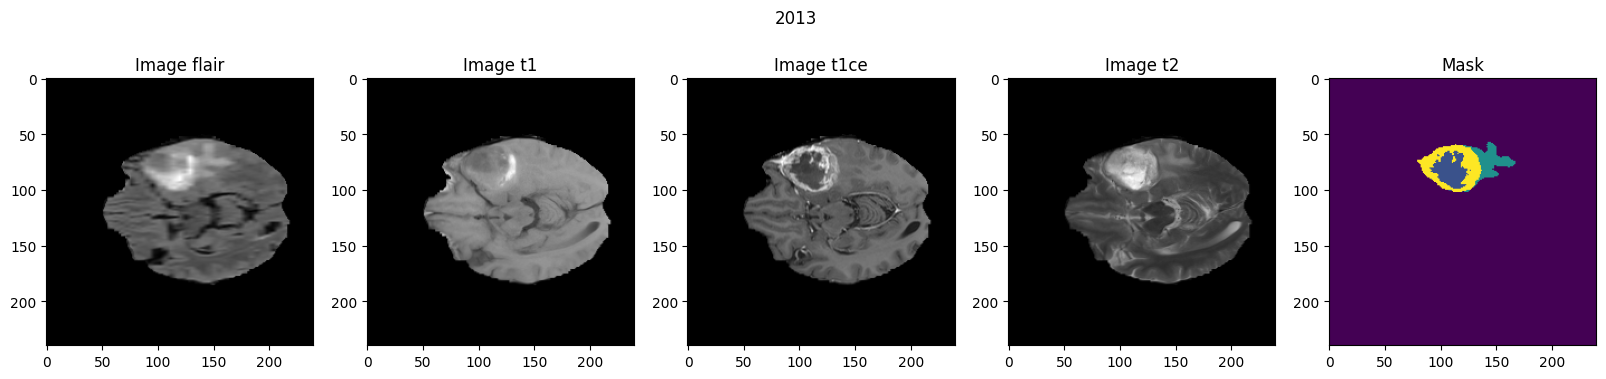

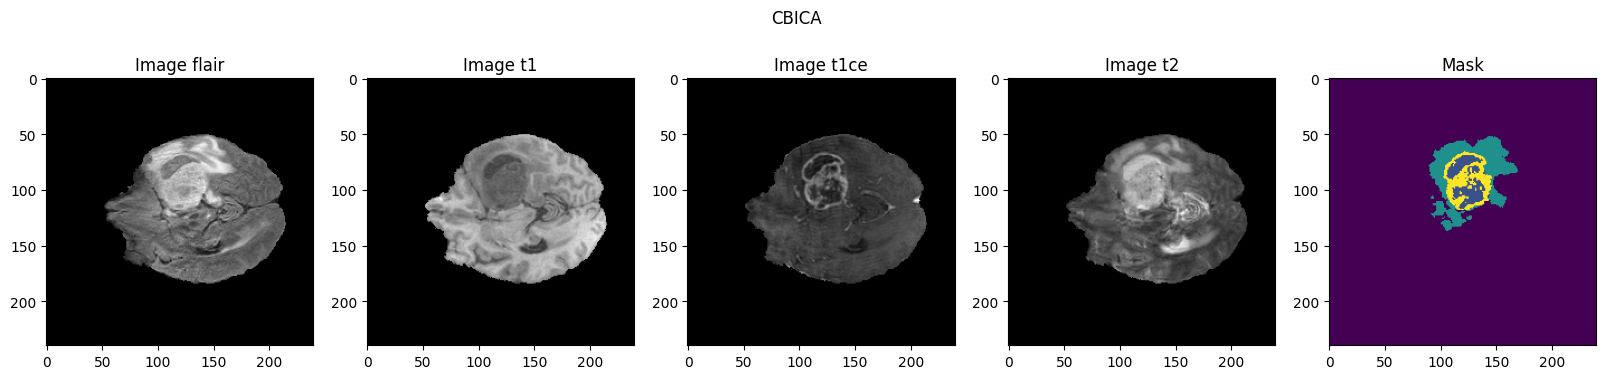

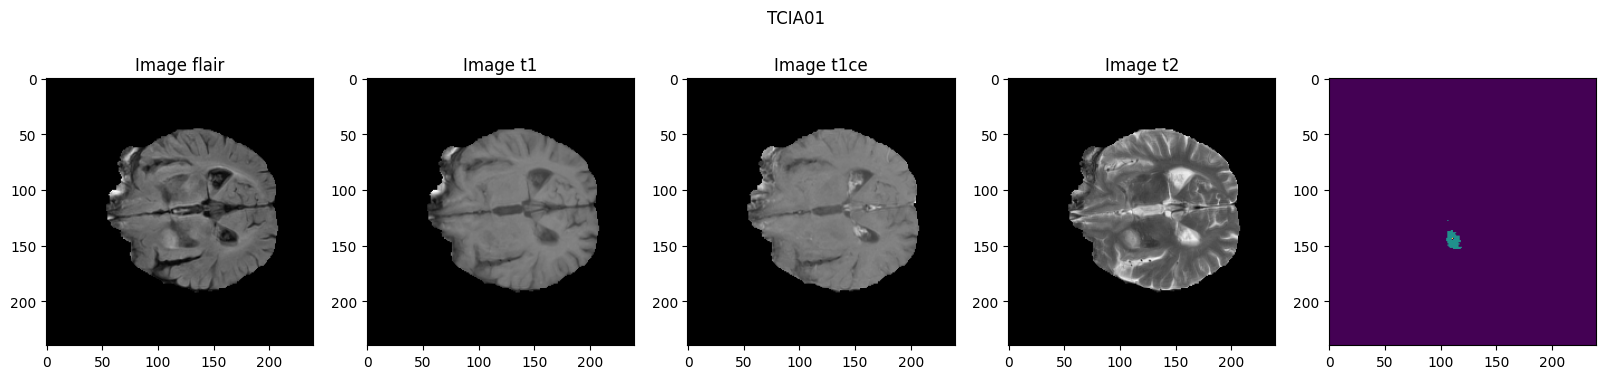

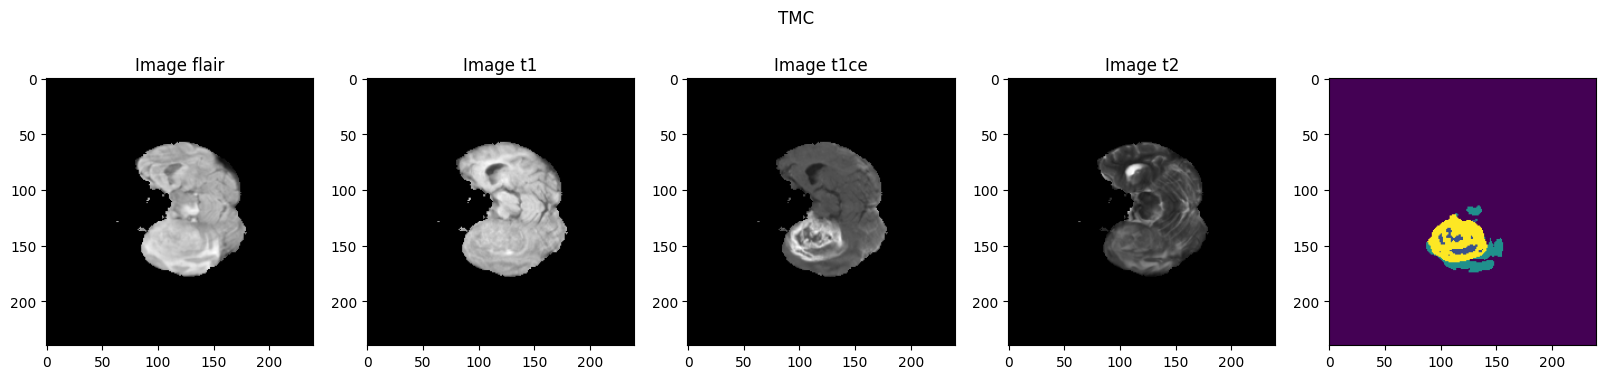

In [12]:
TRAIN_DATASET_PATH = 'Brats 2019/MICCAI_BraTS_2019_Data_Training/HGG/'
#VALIDATION_DATASET_PATH = '../input/d/debobratachakraborty/brats2018-dataset/MICCAI_BraTS_2018_Data_Training/'

test_image_flair_19=nib.load(TRAIN_DATASET_PATH + 'BraTS19_2013_10_1/BraTS19_2013_10_1_flair.nii').get_fdata()
test_image_t1_19=nib.load(TRAIN_DATASET_PATH + 'BraTS19_2013_10_1/BraTS19_2013_10_1_t1.nii').get_fdata()
test_image_t1ce_19=nib.load(TRAIN_DATASET_PATH + 'BraTS19_2013_10_1/BraTS19_2013_10_1_t1ce.nii').get_fdata()
test_image_t2_19=nib.load(TRAIN_DATASET_PATH + 'BraTS19_2013_10_1/BraTS19_2013_10_1_t2.nii').get_fdata()
test_mask_19=nib.load(TRAIN_DATASET_PATH + 'BraTS19_2013_10_1/BraTS19_2013_10_1_seg.nii').get_fdata()

test_image_flair_CBICA=nib.load(TRAIN_DATASET_PATH + 'BraTS19_CBICA_AAB_1/BraTS19_CBICA_AAB_1_flair.nii').get_fdata()
test_image_t1_CBICA=nib.load(TRAIN_DATASET_PATH + 'BraTS19_CBICA_AAB_1/BraTS19_CBICA_AAB_1_t1.nii').get_fdata()
test_image_t1ce_CBICA=nib.load(TRAIN_DATASET_PATH + 'BraTS19_CBICA_AAB_1/BraTS19_CBICA_AAB_1_t1ce.nii').get_fdata()
test_image_t2_CBICA=nib.load(TRAIN_DATASET_PATH + 'BraTS19_CBICA_AAB_1/BraTS19_CBICA_AAB_1_t2.nii').get_fdata()
test_mask_CBICA=nib.load(TRAIN_DATASET_PATH + 'BraTS19_CBICA_AAB_1/BraTS19_CBICA_AAB_1_seg.nii').get_fdata()

test_image_flair_TCIA01=nib.load(TRAIN_DATASET_PATH + 'BraTS19_TCIA01_131_1/BraTS19_TCIA01_131_1_flair.nii').get_fdata()
test_image_t1_TCIA01=nib.load(TRAIN_DATASET_PATH + 'BraTS19_TCIA01_131_1/BraTS19_TCIA01_131_1_t1.nii').get_fdata()
test_image_t1ce_TCIA01=nib.load(TRAIN_DATASET_PATH + 'BraTS19_TCIA01_131_1/BraTS19_TCIA01_131_1_t1ce.nii').get_fdata()
test_image_t2_TCIA01=nib.load(TRAIN_DATASET_PATH + 'BraTS19_TCIA01_131_1/BraTS19_TCIA01_131_1_t2.nii').get_fdata()
test_mask_TCIA01=nib.load(TRAIN_DATASET_PATH + 'BraTS19_TCIA01_131_1/BraTS19_TCIA01_131_1_seg.nii').get_fdata()

test_image_flair_TMC=nib.load(TRAIN_DATASET_PATH + 'BraTS19_TMC_06290_1/BraTS19_TMC_06290_1_flair.nii').get_fdata()
test_image_t1_TMC=nib.load(TRAIN_DATASET_PATH + 'BraTS19_TMC_06290_1/BraTS19_TMC_06290_1_t1.nii').get_fdata()
test_image_t1ce_TMC=nib.load(TRAIN_DATASET_PATH + 'BraTS19_TMC_06290_1/BraTS19_TMC_06290_1_t1ce.nii').get_fdata()
test_image_t2_TMC=nib.load(TRAIN_DATASET_PATH + 'BraTS19_TMC_06290_1/BraTS19_TMC_06290_1_t2.nii').get_fdata()
test_mask_TMC=nib.load(TRAIN_DATASET_PATH + 'BraTS19_TMC_06290_1/BraTS19_TMC_06290_1_seg.nii').get_fdata()

fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(1,5, figsize = (20, 5))
ax1.imshow(test_image_flair_19[:,:,test_image_flair_19.shape[0]//2-slice_w], cmap = 'gray')
fig.suptitle('2013',y=0.9)
ax1.set_title('Image flair')
ax2.imshow(test_image_t1_19[:,:,test_image_t1_19.shape[0]//2-slice_w], cmap = 'gray')
ax2.set_title('Image t1')
ax3.imshow(test_image_t1ce_19[:,:,test_image_t1ce_19.shape[0]//2-slice_w], cmap = 'gray')
ax3.set_title('Image t1ce')
ax4.imshow(test_image_t2_19[:,:,test_image_t2_19.shape[0]//2-slice_w], cmap = 'gray')
ax4.set_title('Image t2')
ax5.imshow(test_mask_19[:,:,test_mask_19.shape[0]//2-slice_w])
ax5.set_title('Mask')
plt.show()


fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(1,5, figsize = (20, 5))
ax1.imshow(test_image_flair_CBICA[:,:,test_image_flair_CBICA.shape[0]//2-slice_w], cmap = 'gray')
ax1.set_title('Image flair')
ax2.imshow(test_image_t1_CBICA[:,:,test_image_t1_CBICA.shape[0]//2-slice_w], cmap = 'gray')
ax2.set_title('Image t1')
ax3.imshow(test_image_t1ce_CBICA[:,:,test_image_t1ce_CBICA.shape[0]//2-slice_w], cmap = 'gray')
ax3.set_title('Image t1ce')
ax4.imshow(test_image_t2_CBICA[:,:,test_image_t2_CBICA.shape[0]//2-slice_w], cmap = 'gray')
ax4.set_title('Image t2')
ax5.imshow(test_mask_CBICA[:,:,test_mask_CBICA.shape[0]//2-slice_w])
ax5.set_title('Mask')
fig.suptitle('CBICA',y=0.9)
plt.show()

fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(1,5, figsize = (20, 5))
fig.suptitle('TCIA01',y=0.9)
ax1.imshow(test_image_flair_TCIA01[:,:,test_image_flair_TCIA01.shape[0]//2-slice_w], cmap = 'gray')
ax1.set_title('Image flair')
ax2.imshow(test_image_t1_TCIA01[:,:,test_image_t1_TCIA01.shape[0]//2-slice_w], cmap = 'gray')
ax2.set_title('Image t1')
ax3.imshow(test_image_t1ce_TCIA01[:,:,test_image_t1ce_TCIA01.shape[0]//2-slice_w], cmap = 'gray')
ax3.set_title('Image t1ce')
ax4.imshow(test_image_t2_TCIA01[:,:,test_image_t2_TCIA01.shape[0]//2-slice_w], cmap = 'gray')
ax4.set_title('Image t2')
ax5.imshow(test_mask_TCIA01[:,:,test_mask_TCIA01.shape[0]//2-slice_w])
plt.show()


fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(1,5, figsize = (20, 5))
fig.suptitle('TMC',y=0.9)
ax1.imshow(test_image_flair_TMC[:,:,test_image_flair_TMC.shape[0]//2-slice_w], cmap = 'gray')
ax1.set_title('Image flair')
ax2.imshow(test_image_t1_TMC[:,:,test_image_t1_TMC.shape[0]//2-slice_w], cmap = 'gray')
ax2.set_title('Image t1')
ax3.imshow(test_image_t1ce_TMC[:,:,test_image_t1ce_TMC.shape[0]//2-slice_w], cmap = 'gray')
ax3.set_title('Image t1ce')
ax4.imshow(test_image_t2_TMC[:,:,test_image_t2_TMC.shape[0]//2-slice_w], cmap = 'gray')
ax4.set_title('Image t2')
ax5.imshow(test_mask_TMC[:,:,test_mask_TMC.shape[0]//2-slice_w])
plt.show()


## Python

2013 20
CBICA 129
TCIA01 22
TMC 8
flair loaded for datasets: {'2013': 3, 'CBICA': 3, 'TCIA01': 3, 'TMC': 3}
t1 loaded for datasets: {'2013': 3, 'CBICA': 3, 'TCIA01': 3, 'TMC': 3}
t1ce loaded for datasets: {'2013': 3, 'CBICA': 3, 'TCIA01': 3, 'TMC': 3}
t2 loaded for datasets: {'2013': 3, 'CBICA': 3, 'TCIA01': 3, 'TMC': 3}
26784000
26784000
26784000
26784000
26784000
26784000
26784000
26784000
26784000
26784000
26784000
26784000
26784000
26784000
26784000
26784000


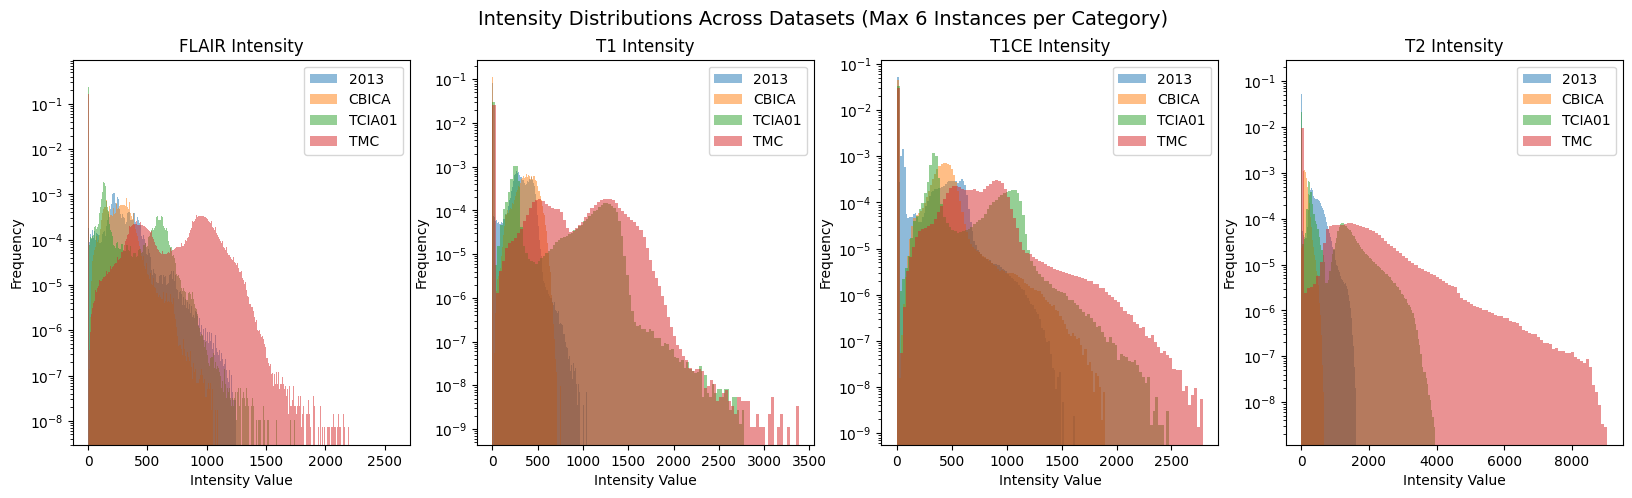

In [13]:
import os
import nibabel as nib
import numpy as np
import matplotlib.pyplot as plt
import torch as t

# Define paths for different datasets
TRAIN_DATASET_PATH = "Brats 2019/MICCAI_BraTS_2019_Data_Training/HGG/"

# Use os.walk to populate dataset_paths
dataset_paths = {
    "2013": [],
    "CBICA": [],
    "TCIA01": [],
    "TMC": []
}

for root, dirs, files in os.walk(TRAIN_DATASET_PATH):
    for dir_name in dirs:
        if "BraTS19" in dir_name:
            if "2013" in dir_name:
                dataset_paths["2013"].append(os.path.join(root, dir_name))
            elif "CBICA" in dir_name:
                dataset_paths["CBICA"].append(os.path.join(root, dir_name))
            elif "TCIA01" in dir_name:
                dataset_paths["TCIA01"].append(os.path.join(root, dir_name))
            elif "TMC" in dir_name:
                dataset_paths["TMC"].append(os.path.join(root, dir_name))



for keys in dataset_paths.keys():
    print(keys, len(dataset_paths[keys]))
# Limit to max 6 instances per category
for category in dataset_paths.keys():
    dataset_paths[category] = dataset_paths[category][:3]  # Keep only first 6 instances

# Modalities
modalities = ["flair", "t1", "t1ce", "t2"]

# Store intensity distributions
intensity_distributions = {modality: {category: [] for category in dataset_paths.keys()} for modality in modalities}

# Load images and extract intensity values
for category, paths in dataset_paths.items():
    for path in paths:
        for modality in modalities:
            file_path = os.path.join(path, f"{os.path.basename(path)}_{modality}.nii")

            if os.path.exists(file_path):  # Check if file exists
                try:
                    img = nib.load(file_path).get_fdata()
                    intensity_distributions[modality][category].append(img.flatten())
                except Exception as e:
                    print(f"Error loading {file_path}: {e}")
            else:
                print(f"Missing file: {file_path}")

# Verify if images were loaded correctly
for modality in modalities:
    print(f"{modality} loaded for datasets:", 
          {category: len(intensity_distributions[modality][category]) for category in dataset_paths.keys()})

# Plot intensity distributions with improved FLAIR binning
fig, axes = plt.subplots(1, 4, figsize=(20, 5))
fig.suptitle("Intensity Distributions Across Datasets (Max 6 Instances per Category)", fontsize=14)

for i, modality in enumerate(modalities):
    for category in dataset_paths.keys():
        if len(intensity_distributions[modality][category]) > 0:
            data_flattened = np.concatenate(intensity_distributions[modality][category])
            print(len(data_flattened))
            # Increase bins for FLAIR for better readability
            bins = 500 if modality == "flair" else 100  
            axes[i].hist(data_flattened, bins=bins, alpha=0.5, label=category, density=True)
            # Apply log scale if necessary (Optional)
            axes[i].set_yscale("log")

    axes[i].set_title(f"{modality.upper()} Intensity")
    axes[i].set_xlabel("Intensity Value")
    axes[i].set_ylabel("Frequency")
    axes[i].legend()

plt.show()

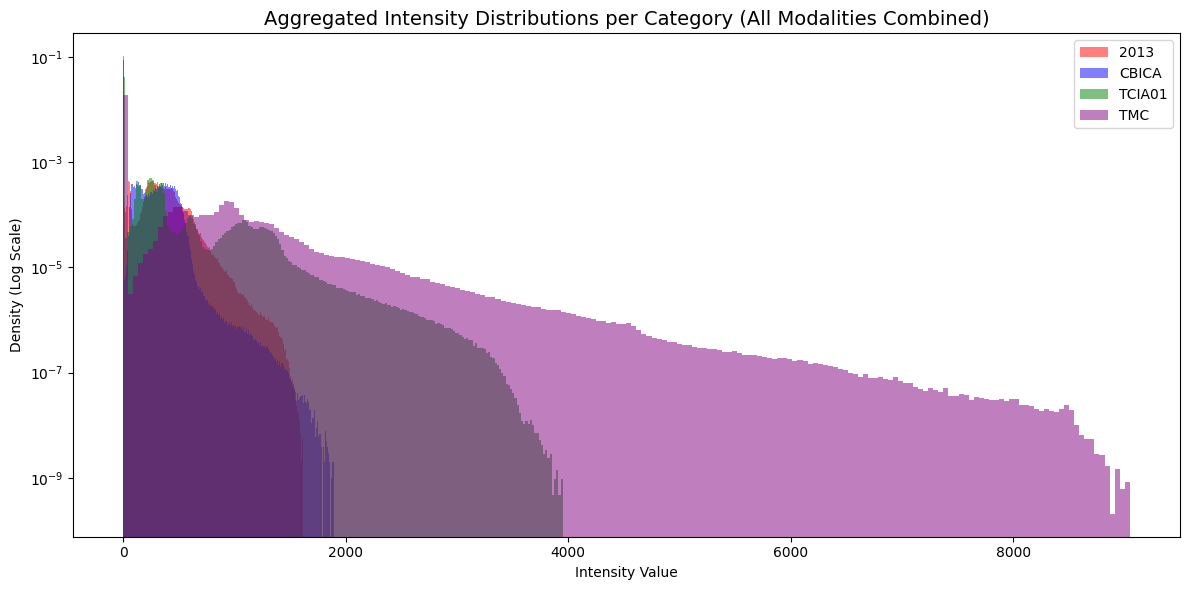

In [2]:
import os
import nibabel as nib
import numpy as np
import matplotlib.pyplot as plt

# Path data
TRAIN_DATASET_PATH = "Brats 2019/MICCAI_BraTS_2019_Data_Training/HGG/"

# Inisialisasi path dataset
dataset_paths = {
    "2013": [],
    "CBICA": [],
    "TCIA01": [],
    "TMC": []
}

# Ambil path folder dari kategori yang sesuai
for root, dirs, files in os.walk(TRAIN_DATASET_PATH):
    for dir_name in dirs:
        if "BraTS19" in dir_name:
            if "2013" in dir_name:
                dataset_paths["2013"].append(os.path.join(root, dir_name))
            elif "CBICA" in dir_name:
                dataset_paths["CBICA"].append(os.path.join(root, dir_name))
            elif "TCIA01" in dir_name:
                dataset_paths["TCIA01"].append(os.path.join(root, dir_name))
            elif "TMC" in dir_name:
                dataset_paths["TMC"].append(os.path.join(root, dir_name))

# Batasi hanya 3 instance per kategori
for category in dataset_paths:
    dataset_paths[category] = dataset_paths[category][:3]

# Modalitas yang digunakan
modalities = ["flair", "t1", "t1ce", "t2"]

# Simpan semua intensitas yang digabung per kategori (semua modality digabung)
aggregated_by_category = {category: [] for category in dataset_paths.keys()}

# Load dan agregasi
for category, paths in dataset_paths.items():
    for path in paths:
        for modality in modalities:
            file_path = os.path.join(path, f"{os.path.basename(path)}_{modality}.nii")
            if os.path.exists(file_path):
                try:
                    img = nib.load(file_path).get_fdata()
                    aggregated_by_category[category].extend(img.flatten())
                except Exception as e:
                    print(f"Error loading {file_path}: {e}")
            else:
                print(f"Missing file: {file_path}")

# Plot hasil agregasi
plt.figure(figsize=(12, 6))
plt.title("Aggregated Intensity Distributions per Category (All Modalities Combined)", fontsize=14)

colors = {
    "2013": "red",
    "CBICA": "blue",
    "TCIA01": "green",
    "TMC": "purple"
}

for category, data in aggregated_by_category.items():
    data = np.array(data)
    if len(data) > 0:
        plt.hist(data, bins=200, alpha=0.5, label=category, density=True, log=True, color=colors[category])

plt.xlabel("Intensity Value")
plt.ylabel("Density (Log Scale)")
plt.legend()
plt.tight_layout()
plt.show()


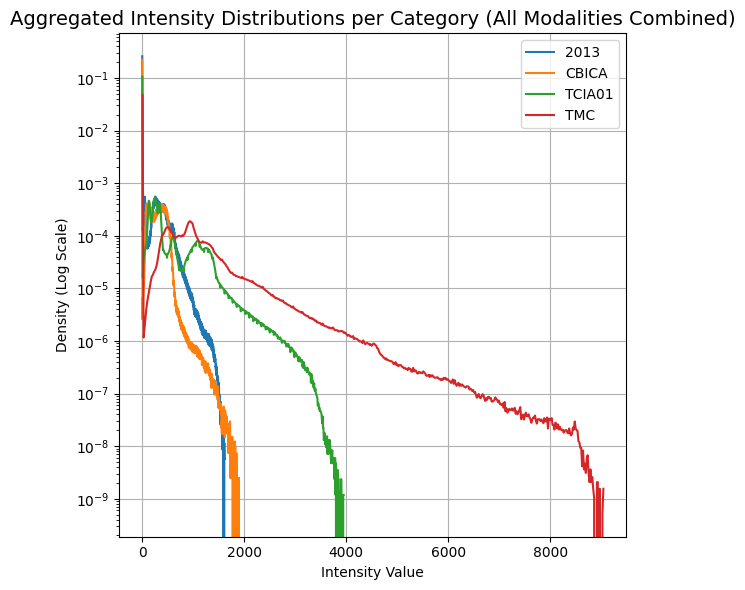

In [5]:
plt.figure(figsize=(6, 6))
plt.title("Aggregated Intensity Distributions per Category (All Modalities Combined)", fontsize=14)

for category, data in aggregated_by_category.items():
    data = np.array(data)
    if len(data) > 0:
        # Hitung histogram, tapi tanpa plot langsung
        hist, bin_edges = np.histogram(data, bins=500, density=True)
        centers = (bin_edges[:-1] + bin_edges[1:]) / 2
        plt.plot(centers, hist, label=category)

plt.xlabel("Intensity Value")
plt.ylabel("Density (Log Scale)")
plt.yscale("log")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

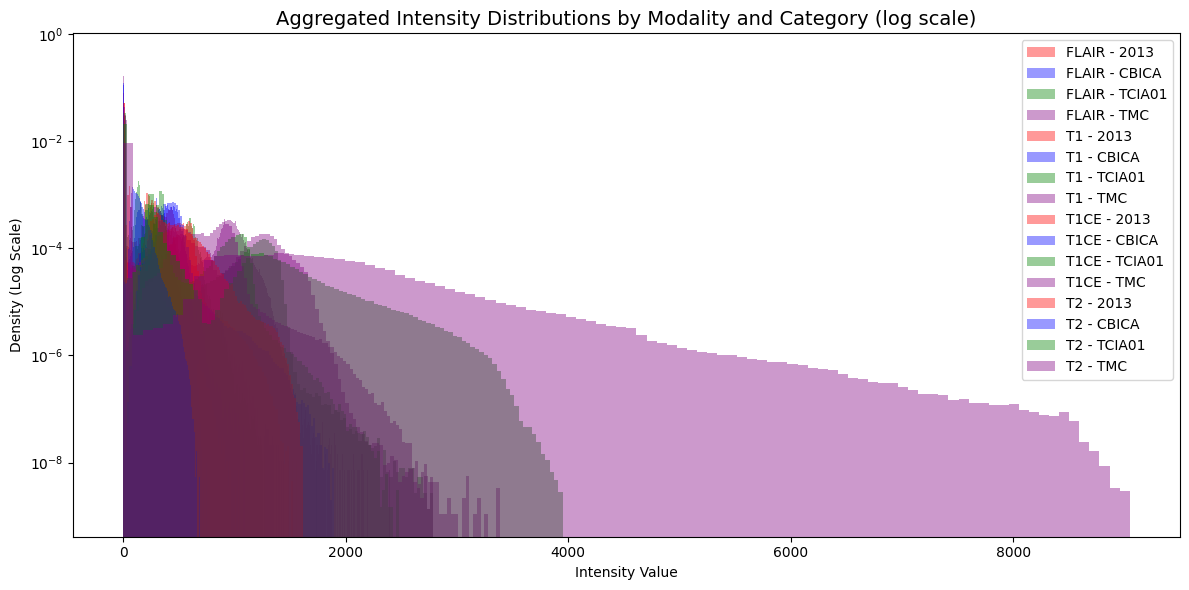

In [1]:
import os
import nibabel as nib
import numpy as np
import matplotlib.pyplot as plt

# Define paths for different datasets
TRAIN_DATASET_PATH = "Brats 2019/MICCAI_BraTS_2019_Data_Training/HGG/"

# Dataset path dictionary
dataset_paths = {
    "2013": [],
    "CBICA": [],
    "TCIA01": [],
    "TMC": []
}

# Populate dataset paths
for root, dirs, files in os.walk(TRAIN_DATASET_PATH):
    for dir_name in dirs:
        if "BraTS19" in dir_name:
            if "2013" in dir_name:
                dataset_paths["2013"].append(os.path.join(root, dir_name))
            elif "CBICA" in dir_name:
                dataset_paths["CBICA"].append(os.path.join(root, dir_name))
            elif "TCIA01" in dir_name:
                dataset_paths["TCIA01"].append(os.path.join(root, dir_name))
            elif "TMC" in dir_name:
                dataset_paths["TMC"].append(os.path.join(root, dir_name))

# Batasi hanya 3 instance per kategori
for category in dataset_paths.keys():
    dataset_paths[category] = dataset_paths[category][:3]

# Modalitas yang digunakan
modalities = ["flair", "t1", "t1ce", "t2"]

# Menyimpan agregasi intensitas
aggregated_intensities = {modality: {category: [] for category in dataset_paths.keys()} for modality in modalities}

# Load dan agregasi data
for category, paths in dataset_paths.items():
    for path in paths:
        for modality in modalities:
            file_path = os.path.join(path, f"{os.path.basename(path)}_{modality}.nii")

            if os.path.exists(file_path):
                try:
                    img = nib.load(file_path).get_fdata()
                    # Agregasi data menjadi satu array besar per kategori per modality
                    aggregated_intensities[modality][category].extend(img.flatten())
                except Exception as e:
                    print(f"Error loading {file_path}: {e}")
            else:
                print(f"Missing file: {file_path}")

# Plot semua dalam satu axis
plt.figure(figsize=(12, 6))
plt.title("Aggregated Intensity Distributions by Modality and Category (log scale)", fontsize=14)

colors = {
    "2013": "red",
    "CBICA": "blue",
    "TCIA01": "green",
    "TMC": "purple"
}

# Loop dan plot
for modality in modalities:
    for category in dataset_paths.keys():
        data = np.array(aggregated_intensities[modality][category])
        if len(data) > 0:
            bins = 500 if modality == "flair" else 100
            label = f"{modality.upper()} - {category}"
            plt.hist(data, bins=bins, alpha=0.4, label=label, density=True, log=True, color=colors[category])

plt.xlabel("Intensity Value")
plt.ylabel("Density (Log Scale)")
plt.legend()
plt.tight_layout()
plt.show()


In [61]:
imgs=np.random.random((100,100,100,3))
imgs.flatten().shape
np.concatenate(imgs).shape

(10000, 100, 3)

In [56]:
img[1,0,0,:]=[0,0,0]

In [ ]:
raise NotImplementedError

## Data Preparation

In [3]:
import os
import torch as t
import nibabel as nib
import numpy as np
from torch.utils.data import Dataset, DataLoader

# Use GPU if available
device = t.device("cuda" if t.cuda.is_available() else "cpu")

# Define paths for different datasets
TRAIN_DATASET_PATH = "Brats 2019/MICCAI_BraTS_2019_Data_Training/HGG/"

# Use os.walk to populate dataset_paths
dataset_paths = {
    "2013": [],
    "CBICA": [],
    "TCIA01": [],
    "TMC": []
}

for root, dirs, files in os.walk(TRAIN_DATASET_PATH):
    for dir_name in dirs:
        if "BraTS19" in dir_name:
            if "2013" in dir_name:
                dataset_paths["2013"].append(os.path.join(root, dir_name))
            elif "CBICA" in dir_name:
                dataset_paths["CBICA"].append(os.path.join(root, dir_name))
            elif "TCIA01" in dir_name:
                dataset_paths["TCIA01"].append(os.path.join(root, dir_name))
            elif "TMC" in dir_name:
                dataset_paths["TMC"].append(os.path.join(root, dir_name))

# Limit to max 3 instances per category
for category in dataset_paths.keys():
    dataset_paths[category] = dataset_paths[category][:3]

# Modalities
modalities = ["flair", "t1", "t1ce", "t2", "seg"]

# Function to normalize MRI intensities using Z-score
def z_score_normalization(img):
    mean = np.mean(img)
    std = np.std(img)
    return (img - mean) / (std + 1e-8)  # Avoid division by zero

# Custom PyTorch Dataset for Multi-Source Domain Adaptation
class BraTSDataset(Dataset):
    def __init__(self, dataset_paths):
        self.data = []  # Store tuples (image tensor, segmentation tensor, domain label)
        
        for domain_label, paths in dataset_paths.items():
            for path in paths:
                modalities_data = []
                
                for modality in modalities:
                    file_path = os.path.join(path, f"{os.path.basename(path)}_{modality}.nii")
                    
                    if os.path.exists(file_path):
                        img = nib.load(file_path).get_fdata()
                        img = z_score_normalization(img)  # Apply normalization
                        img_tensor = t.tensor(img, dtype=t.float32).unsqueeze(0)  # Add channel dim
                        modalities_data.append(img_tensor)
                    else:
                        print(f"Missing file: {file_path}")
                
                if len(modalities_data) == len(modalities):  # Ensure all modalities exist
                    image_tensor = t.cat(modalities_data[:-1], dim=0)  # Stack MRI modalities
                    segmentation_tensor = modalities_data[-1]  # Segmentation mask
                    self.data.append((image_tensor, segmentation_tensor, domain_label))

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        img, seg, domain = self.data[idx]
        return img.to(device), seg.to(device), domain  # Move to GPU if available

# Create Dataset Instance
brats_dataset = BraTSDataset(dataset_paths)

# Define PyTorch DataLoader
batch_size = 1  # Adjust based on GPU memory
brats_dataloader = DataLoader(brats_dataset, batch_size=batch_size, shuffle=True, num_workers=0)

# Verify Dataset
for images, segmentations, domains in brats_dataloader:
    print(f"Batch Shape: {images.shape}, Seg Shape: {segmentations.shape}, Domains: {domains}")
    break  # Check only one batch


Batch Shape: torch.Size([1, 4, 240, 240, 155]), Seg Shape: torch.Size([1, 1, 240, 240, 155]), Domains: ('CBICA',)


# Torch

flair loaded for datasets: {'2013': torch.Size([71424000]), 'CBICA': torch.Size([71424000]), 'TCIA01': torch.Size([71424000]), 'TMC': torch.Size([71424000])}
t1 loaded for datasets: {'2013': torch.Size([71424000]), 'CBICA': torch.Size([71424000]), 'TCIA01': torch.Size([71424000]), 'TMC': torch.Size([71424000])}
t1ce loaded for datasets: {'2013': torch.Size([71424000]), 'CBICA': torch.Size([71424000]), 'TCIA01': torch.Size([71424000]), 'TMC': torch.Size([71424000])}
t2 loaded for datasets: {'2013': torch.Size([71424000]), 'CBICA': torch.Size([71424000]), 'TCIA01': torch.Size([71424000]), 'TMC': torch.Size([71424000])}


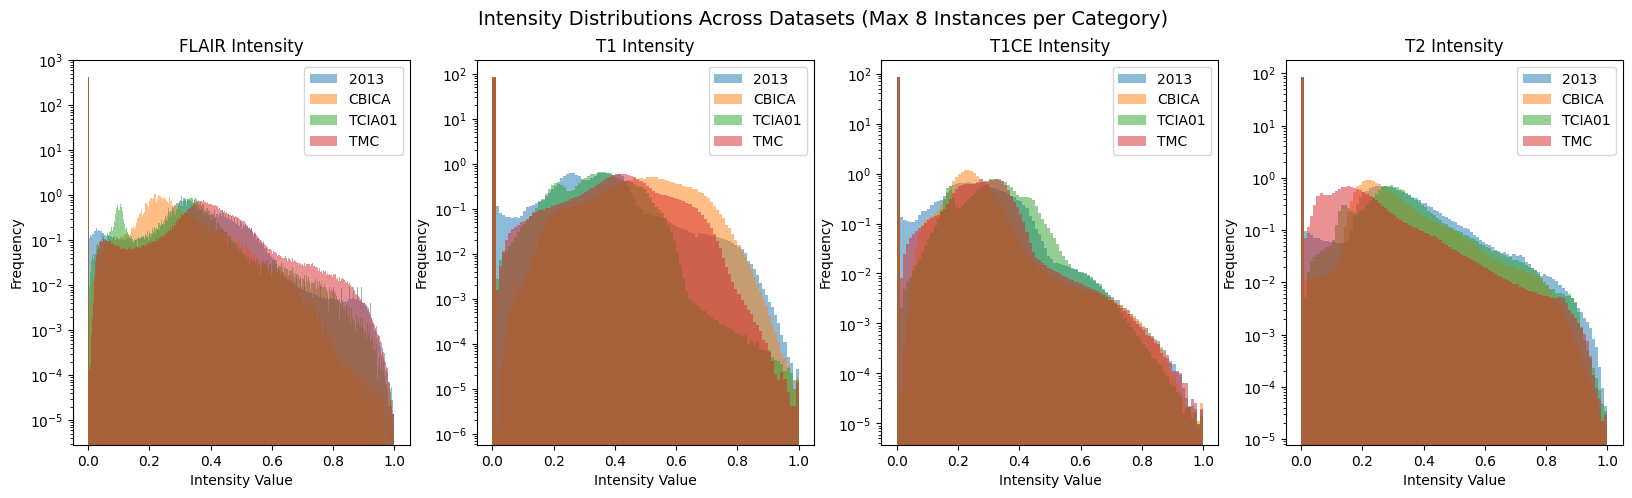

In [ ]:
import os
import nibabel as nib
import numpy as np
import matplotlib.pyplot as plt
import torch as t

# Use GPU if available
device = t.device('cuda' if t.cuda.is_available() else 'cpu')

# Define paths for different datasets
TRAIN_DATASET_PATH = "Brats 2019/MICCAI_BraTS_2019_Data_Training/HGG/"

# Use os.walk to populate dataset_paths
dataset_paths = {
    "2013": [],
    "CBICA": [],
    "TCIA01": [],
    "TMC": []
}

for root, dirs, files in os.walk(TRAIN_DATASET_PATH):
    for dir_name in dirs:
        if "BraTS19" in dir_name:
            if "2013" in dir_name:
                dataset_paths["2013"].append(os.path.join(root, dir_name))
            elif "CBICA" in dir_name:
                dataset_paths["CBICA"].append(os.path.join(root, dir_name))
            elif "TCIA01" in dir_name:
                dataset_paths["TCIA01"].append(os.path.join(root, dir_name))
            elif "TMC" in dir_name:
                dataset_paths["TMC"].append(os.path.join(root, dir_name))

# Limit to max 8 instances per category
for category in dataset_paths.keys():
    dataset_paths[category] = dataset_paths[category][:8]

# Modalities
modalities = ["flair", "t1", "t1ce", "t2"]

# Store intensity distributions using PyTorch Tensors instead of lists
intensity_distributions = {modality: {category: None for category in dataset_paths.keys()} for modality in modalities}

# Load images and extract intensity values
for category, paths in dataset_paths.items():
    for path in paths:
        for modality in modalities:
            file_path = os.path.join(path, f"{os.path.basename(path)}_{modality}.nii")

            if os.path.exists(file_path):  # Check if file exists
                try:
                    img = nib.load(file_path).get_fdata()
                    img = t.tensor(img, dtype=t.float32, device=device)  # Convert to PyTorch tensor

                    # Flatten intensity values
                    img_flat = img.flatten()

                    # Apply Min-Max Normalization
                    img_flat = (img_flat - img_flat.min()) / (img_flat.max() - img_flat.min() + 1e-8)

                    # Efficiently concatenate using torch.cat() instead of list append
                    if intensity_distributions[modality][category] is None:
                        intensity_distributions[modality][category] = img_flat
                    else:
                        intensity_distributions[modality][category] = t.cat((intensity_distributions[modality][category], img_flat))
                
                except Exception as e:
                    print(f"Error loading {file_path}: {e}")
            else:
                print(f"Missing file: {file_path}")

# Verify if images were loaded correctly
for modality in modalities:
    print(f"{modality} loaded for datasets:", 
          {category: intensity_distributions[modality][category].shape if intensity_distributions[modality][category] is not None else 0 for category in dataset_paths.keys()})

# Plot intensity distributions
fig, axes = plt.subplots(1, 4, figsize=(20, 5))
fig.suptitle("Intensity Distributions Across Datasets (Max 8 Instances per Category)", fontsize=14)

for i, modality in enumerate(modalities):
    for category in dataset_paths.keys():
        if intensity_distributions[modality][category] is not None:
            data_flattened = intensity_distributions[modality][category].cpu().numpy()

            # Increase bins for FLAIR for better readability
            bins = 500 if modality == "flair" else 100  
            axes[i].hist(data_flattened, bins=bins, alpha=0.5, label=category, density=True)
            
            # Apply log scale to y-axis for better visualization
            axes[i].set_yscale("log")

    axes[i].set_title(f"{modality.upper()} Intensity")
    axes[i].set_xlabel("Intensity Value")
    axes[i].set_ylabel("Frequency")
    axes[i].legend()

plt.show()

In [69]:
dataset_paths.keys()

dict_keys(['2013', 'CBICA', 'TCIA01', 'TMC'])

In [4]:

t.cuda.empty_cache()

In [ ]:
print(dataset_paths["TCIA01"])

['Brats 2019/MICCAI_BraTS_2019_Data_Training/HGG/BraTS19_TCIA01_131_1', 'Brats 2019/MICCAI_BraTS_2019_Data_Training/HGG/BraTS19_TCIA01_147_1', 'Brats 2019/MICCAI_BraTS_2019_Data_Training/HGG/BraTS19_TCIA01_150_1', 'Brats 2019/MICCAI_BraTS_2019_Data_Training/HGG/BraTS19_TCIA01_180_1', 'Brats 2019/MICCAI_BraTS_2019_Data_Training/HGG/BraTS19_TCIA01_186_1', 'Brats 2019/MICCAI_BraTS_2019_Data_Training/HGG/BraTS19_TCIA01_190_1', 'Brats 2019/MICCAI_BraTS_2019_Data_Training/HGG/BraTS19_TCIA01_201_1', 'Brats 2019/MICCAI_BraTS_2019_Data_Training/HGG/BraTS19_TCIA01_203_1', 'Brats 2019/MICCAI_BraTS_2019_Data_Training/HGG/BraTS19_TCIA01_221_1', 'Brats 2019/MICCAI_BraTS_2019_Data_Training/HGG/BraTS19_TCIA01_231_1', 'Brats 2019/MICCAI_BraTS_2019_Data_Training/HGG/BraTS19_TCIA01_235_1', 'Brats 2019/MICCAI_BraTS_2019_Data_Training/HGG/BraTS19_TCIA01_335_1', 'Brats 2019/MICCAI_BraTS_2019_Data_Training/HGG/BraTS19_TCIA01_378_1', 'Brats 2019/MICCAI_BraTS_2019_Data_Training/HGG/BraTS19_TCIA01_390_1', 'Brat

In [ ]:
np.unique()

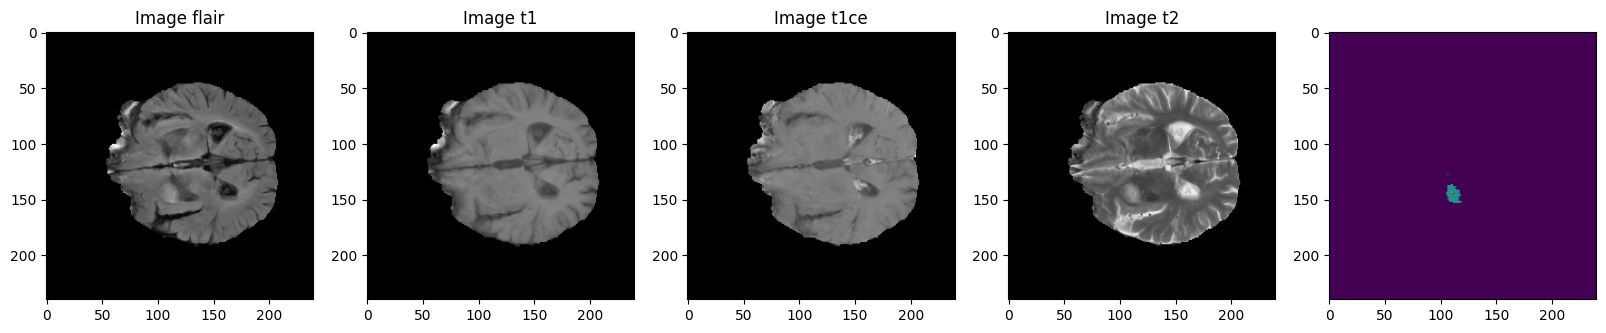

In [ ]:

fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(1,5, figsize = (20, 10))
ax1.imshow(test_image_flair_TCIA01[:,:,test_image_flair_TCIA01.shape[0]//2-slice_w], cmap = 'gray')
ax1.set_title('Image flair')
ax2.imshow(test_image_t1_TCIA01[:,:,test_image_t1_TCIA01.shape[0]//2-slice_w], cmap = 'gray')
ax2.set_title('Image t1')
ax3.imshow(test_image_t1ce_TCIA01[:,:,test_image_t1ce_TCIA01.shape[0]//2-slice_w], cmap = 'gray')
ax3.set_title('Image t1ce')
ax4.imshow(test_image_t2_TCIA01[:,:,test_image_t2_TCIA01.shape[0]//2-slice_w], cmap = 'gray')
ax4.set_title('Image t2')
ax5.imshow(test_mask_TCIA01[:,:,test_mask_TCIA01.shape[0]//2-slice_w])

In [ ]:
np.unique(test_mask_TMC[:,:,:])

array([0., 1., 2., 4.])

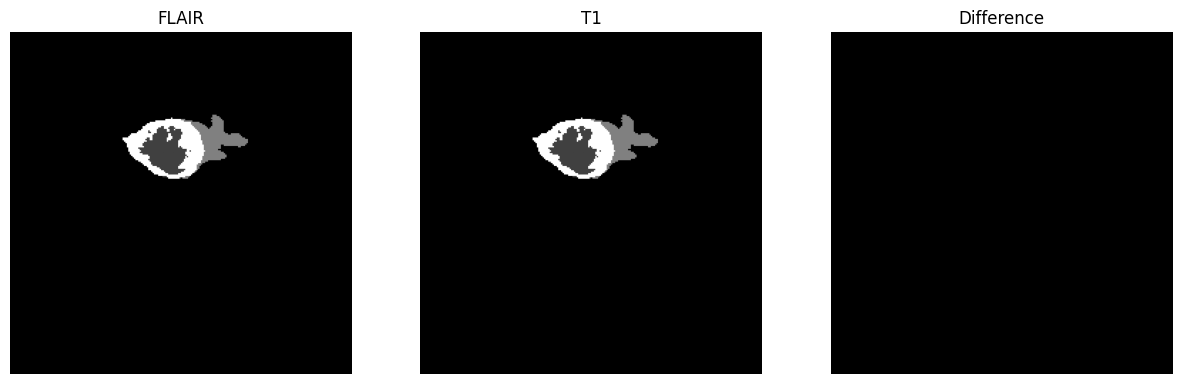

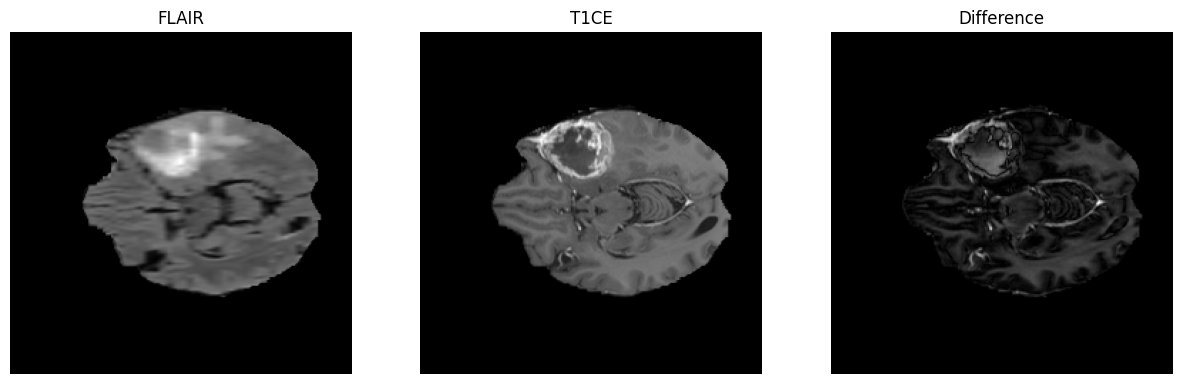

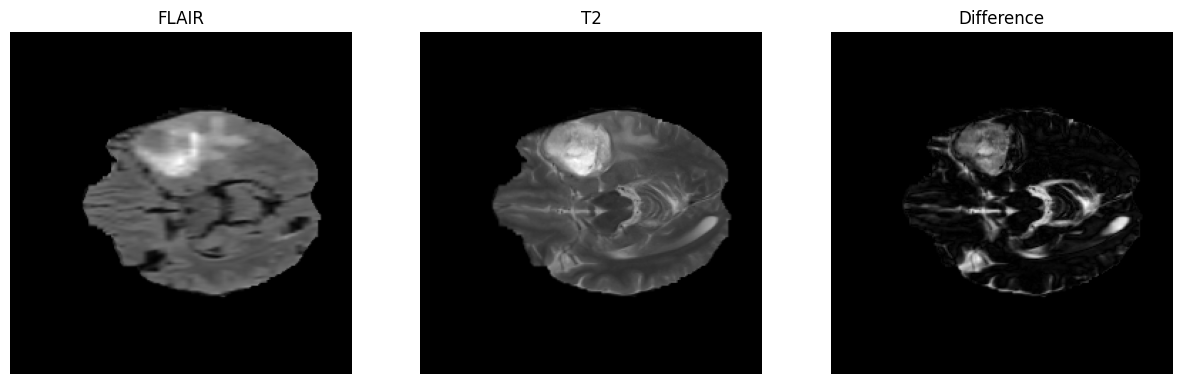

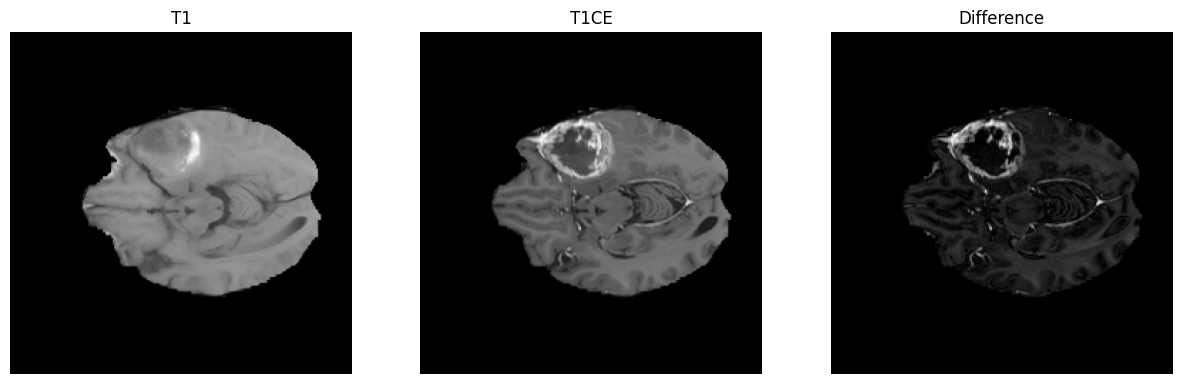

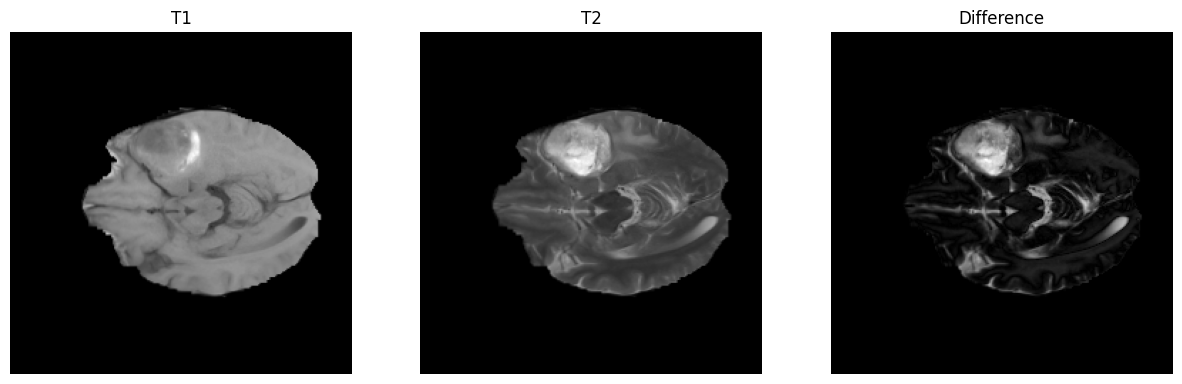

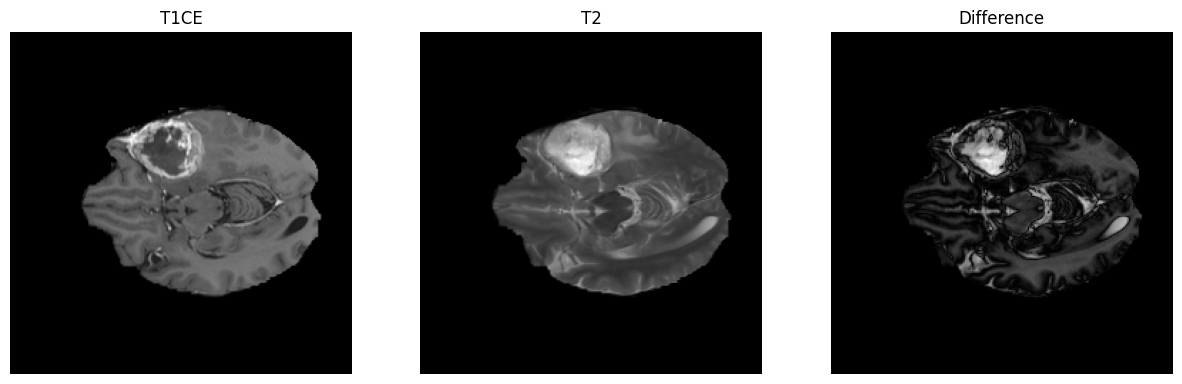

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def plot_image_comparison(image1, image2, title1, title2):
    fig, axes = plt.subplots(1, 3, figsize=(15, 5))
    axes[0].imshow(image1, cmap='gray')
    axes[0].set_title(title1)
    axes[0].axis('off')
    
    axes[1].imshow(image2, cmap='gray')
    axes[1].set_title(title2)
    axes[1].axis('off')
    
    diff = np.abs(image1 - image2)
    axes[2].imshow(diff, cmap='gray')
    axes[2].set_title('Difference')
    axes[2].axis('off')
    
    plt.show()

# Example usage with FLAIR, T1, T1CE, and T2 images
slice_index = test_image_flair.shape[0] // 2 - slice_w

flair_slice = test_image_flair[:, :, slice_index]
t1_slice = test_image_t1[:, :, slice_index]
t1ce_slice = test_image_t1ce[:, :, slice_index]
t2_slice = test_image_t2[:, :, slice_index]

plot_image_comparison(test_mask_17[:, :, slice_index],test_mask[:, :, slice_index], 'FLAIR', 'T1')
plot_image_comparison(flair_slice, t1ce_slice, 'FLAIR', 'T1CE')
plot_image_comparison(flair_slice, t2_slice, 'FLAIR', 'T2')
plot_image_comparison(t1_slice, t1ce_slice, 'T1', 'T1CE')
plot_image_comparison(t1_slice, t2_slice, 'T1', 'T2')
plot_image_comparison(t1ce_slice, t2_slice, 'T1CE', 'T2')

In [ ]:
raise NotImplementedError()

NotImplementedError: 

In [ ]:
test_image_flair.shape
print(test_image_flair.shape[0]//2-slice_w)

60


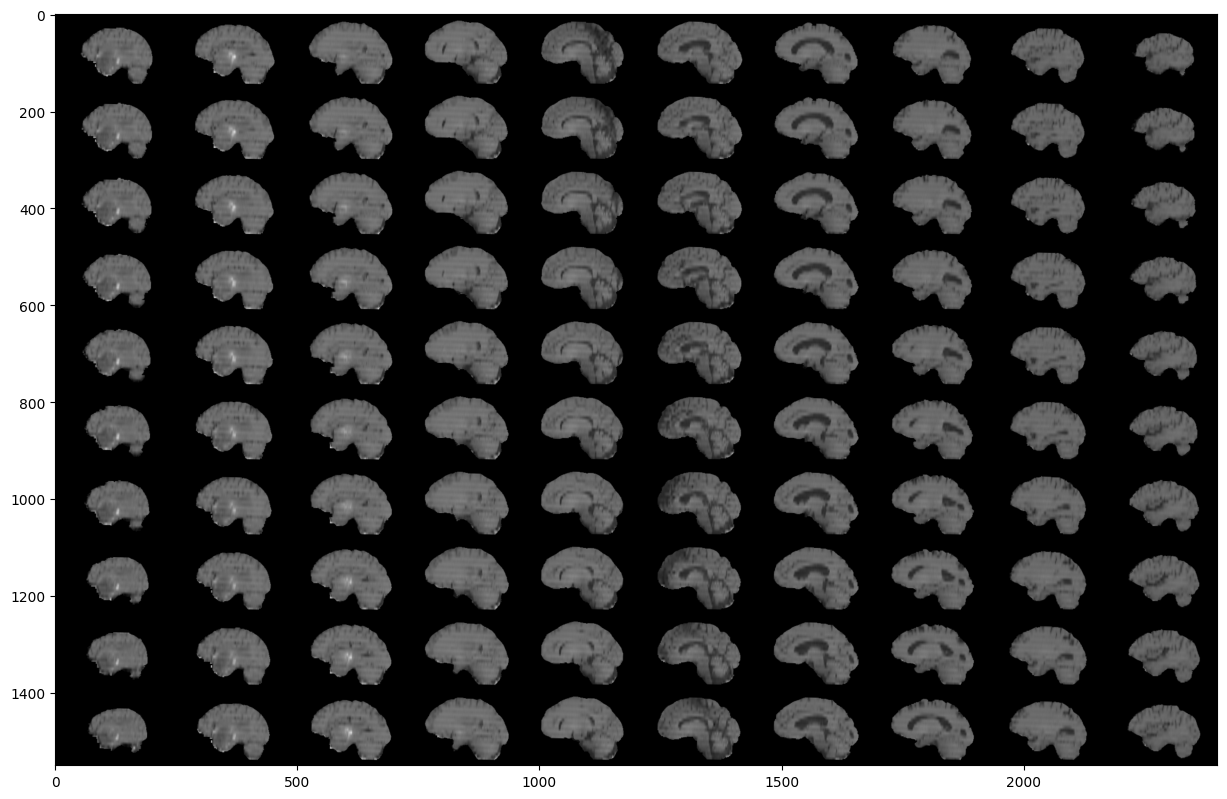

In [ ]:
fig, ax1 = plt.subplots(1, 1, figsize = (15,15))
ax1.imshow(rotate(montage(test_image_t1[70:-70,:,:]), 90, resize=True), cmap ='gray')

In [ ]:
test_image_t1[:,:,:].shape

(240, 240, 155)

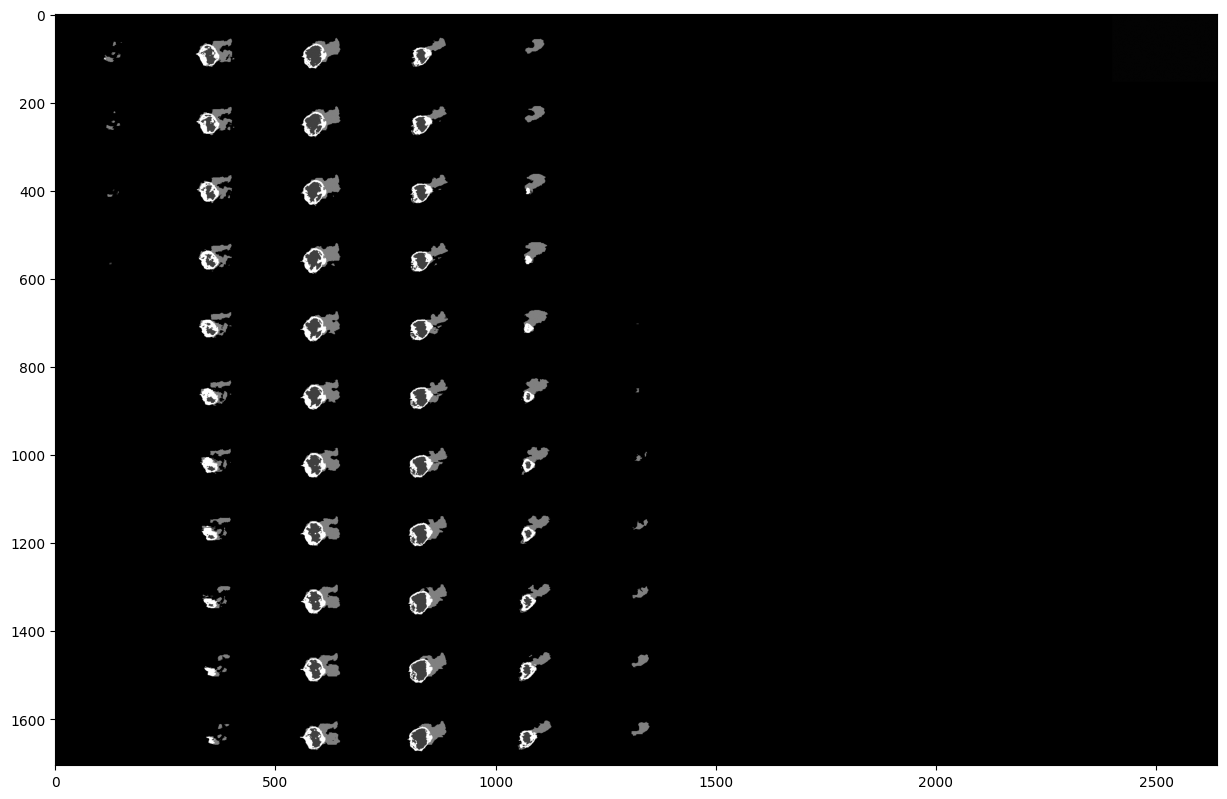

In [ ]:
fig, ax1 = plt.subplots(1, 1, figsize = (15,15))
ax1.imshow(rotate(montage(test_mask[50:-70,:,:]), 90, resize=True), cmap ='gray')

In [ ]:
niimg = nl.image.load_img(TRAIN_DATASET_PATH + 'Brats17_2013_10_1/Brats17_2013_10_1_flair.nii')
nimask = nl.image.load_img(TRAIN_DATASET_PATH + 'Brats17_2013_10_1/Brats17_2013_10_1_seg.nii')

fig, axes = plt.subplots(nrows=4, figsize=(30, 40))


nlplt.plot_anat(niimg,
                title='BraTS19_Training_10_1_flair.nii plot_anat',
                axes=axes[0])

nlplt.plot_epi(niimg,
               title='BraTS19_Training_10_1_flair.nii plot_epi',
               axes=axes[1])

nlplt.plot_img(niimg,
               title='BraTS19_Training_10_1_flair.nii plot_img',
               axes=axes[2])

nlplt.plot_roi(nimask, 
               title='BraTS19_Training_10_1_flair.nii with mask plot_roi',
               bg_img=niimg, 
               axes=axes[3], cmap='Paired')

plt.show()

ValueError: File not found: 'Brats 2018/MICCAI_BraTS_2018_Data_Training/HGG/Brats17_2013_10_1/Brats17_2013_10_1_flair.nii'